# Modelleringsprosjekt oppgave 2: Epidemiologi 


## Oppgave 1.
### Løs oppgave 8.21 (8.20) i boka

#### Oppgave a)

$S^\prime(t) = -b \cdot S(t) \cdot I(t)$\
$R^\prime(t) = f \cdot I(t)$

Vi vet at den deriverte til en graf er stigningstallet til grafen. Dette betyr at $S^\prime(t)$ er antallet personer som kan bli smittet minsker med per dag (hvis vi regner $t$ i dager). Ut ifra oppgaven får vi vite at en smittet person smitter $b \cdot S(t)$ andre personer. Dermed vet vi at antallet personer som blir smittet hver dag er $b \cdot S(t) \cdot I(t)$, (hvor mange hver smittede person smitter $\cdot$ antall smittede personer). Ettersom det er færre som kan bli smittet når tiden går, må $S^\prime(t)$ være negativ. Derfor setter vi konstanten $b$ til å være negativ slik at den deriverte av $S(t)$ blir negativ. 

Grunnen til at vi må løse disse likningene er slik at vi kan bruke eulers metode. I eulers metode trenger man den deriverte av funksjonen, samt en y verdi for funksjonen. Vi trenger med andre ord å løse denne likningen for å finne det neste punktet på grafen til differentiallikningen $S(t)$.

Ut i fra oppgaven får vi vite at $f$ prosent av de syke menneskene blir friske hver dag. Om vi gjør om denne setningen til matte får vi $R^\prime(t)$, (hvor mange som blir frise hver dag), $= f \cdot I(t)$. Vi må løse denne likningen for å kunne finne det neste punktet på differentiallikningen $R(t)$ med eulers metode.

#### Oppgave b)

$S^\prime(t) + I^\prime(t) + R^\prime(t) = 0$

Vi kan vise hvorfor denne likningen må stemme på 2 måter. Jeg vil starte med den logiske og virkelighetsbaserte forklaringen. $S^\prime(t)$ er som sagt hvor mange færre av befolknignen som kan bli smittet hver dag og et negativt tall. $I^\prime(t)$ er hvor mange som blir smittet hver dag, og $R^\prime(t)$ er hvor mange som blir friske hver dag. I oppgaven får vi vite at de som er blitt friske kan ikke bil syke igjen. Dermed er de imune og minsker derfor antallet mennesker som kan bli smittet. Man kan derfor på en måte i dette tilfellet se på $R^\prime(t)$ som det samme som $I^\prime(t)$, ettersom de har samme funksjon. Derfor må $S^\prime(t) + I^\prime(t) + R^\prime(t) = 0$.

Den andre måten å løse dette på er å derivere utrykket $S(t) + I(t) + R(t) = N$. Antallet som kan bli smittet, + antallet som er smittet + antallet som er friske vil tilsvare hele befolkningen. Om vi vil finne ut hvordan dette forandrer seg per dag må vi derivere uttrykket. Om vi deriverer uttrykket får vi $S^\prime(t) + I^\prime(t) + R^\prime(t) = 0$, ettersom en konstant derivert blir 0.

$I^\prime(t) = b \cdot S(t) \cdot I(t)-f \cdot I(t)$

For å vise at dette stemmer tar vi utgangspunkt i likningen $S^\prime(t) + I^\prime(t) + R^\prime(t) = 0$. Ut i fra denne ser vi at vi får $I^\prime(t) = - S^\prime(t) - R^\prime(t)$ om vi flytter $S^\prime(t)$ og $R^\prime(t)$ over på andre siden av likhetstegnet. Vi har likningen for både $S^\prime(t)$ og $R^\prime(t)$ så vi setter inn verdiene for disse i likningen og får $I^\prime(t) = - (- b \cdot S(t) \cdot I(t))-(f \cdot I(t))$. Vi løser opp parentesene og får $I^\prime(t) = b \cdot S(t) \cdot I(t)-f \cdot I(t)$.


#### Oppgave c)

In [1]:
import numpy as np #Importerer numpy for å opprette arrays
import matplotlib.pyplot as plt #Importerer pyplot for å plotte

#Oppretter konstanter som brukes
N = 124000
f, b = 0.2, 2e-5
I0, R0 = 10, 0
S0 = N - I0
t1, t2, antall = 0, 10, 1001

#Oppretter tiden for 0-10 dager med 1001 gjevnt fordelte punkter mellom 0 og 10, og delta t
t = np.linspace(t1, t2, antall) 
dt = (t2-t1)/(antall-1)


#Oppretter 3 forskjellige arrays for S, I, R med "antall" plasser i hver og kobler S0, I0 og R0 til den første t-verdien (0)
S, I, R = np.zeros([3, antall]) 
S[0], I[0], R[0] = S0, I0, R0  

#Oppretter en for-løkke og oppdaterer arrayene med nye y-verdeien for hver t med eulersmetode
for i in range(antall-1): 
    S[i+1] = S[i] - b*S[i]*I[i]*dt #eulersmetode, y = y(i)+y'(i)*dt og kobler y verdien til t verdien i arrayen
    I[i+1] = I[i] + ((b*S[i]*I[i])-(f*I[i]))*dt
    R[i+1] = R[i] + f*I[i]*dt

#Plotter grafene med tittel, farger, navn, oversikt over grafene og navn på x- og y-aksene
plt.plot(t, S, color = "darkorange", label = "Kan bli smittet") 
plt.plot(t, I, color = "crimson", label = "Er smittet") 
plt.plot(t, R, color = "lime", label = "Kurerte!") 
plt.title("Naturlig utvikling med SIR modell") 
plt.xlabel("Dager") 
plt.ylabel("Mennesker")
plt.legend(loc = "upper right") 
plt.show() 


<Figure size 640x480 with 1 Axes>

#### Oppgave d)

In [2]:
#import numpy as np
#import matplotlib.pyplot as plt

#Oppretter funksjonen "sirmodell10" med parametere
def sirmodell10(tidssteg, bt, ft, S0, I0, R0):
    
    t1, t2 = 0, 10
    
    #Tar utgangspunkt i at vi vil finne utviklingen over 10 dager og oppretter delta t
    t = np.linspace(t1, t2, tidssteg) 
    dt = (t2/(tidssteg-1))
    

    #Oppretter arrays og kobler 0 til Y(0) for hver av S,I,R
    S, I, R = np.zeros([3, tidssteg])
    S[0], I[0], R[0] = S0, I0, R0
    
    #Oppdaterer arraysene med verdier for y(t)
    for i in range(tidssteg-1): 
        S[i+1] = S[i] - bt(i*dt)*S[i]*I[i]*dt #ganger med dt i bt og ft for finne antall dager som er gått ved i
        I[i+1] = I[i] + ((bt(i*dt)*S[i]*I[i])-(ft(i*dt)*I[i]))*dt 
        R[i+1] = R[i] + ft(i*dt)*I[i]*dt

    
    return t, S, I, R


Siden vi i følge oppgaven skulle skrive hele oppgaven i 1 jupyter notebook har jeg ikke fått 
hentet funksjonen "sirmodell" fra en annen fil slik 8.21 spør om. Nedenfor ser du resten av oppgave d)
som er en kalling av funksjonen og den tilhørende grafen


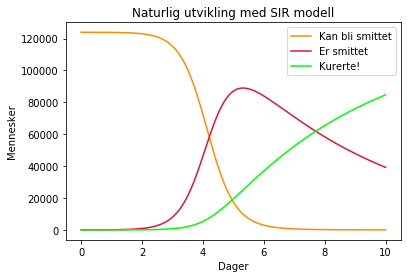

Alle verdier er like!


In [3]:
"""Passer på at filen med koden vi lagde i d ligger samme sted som denne filen oppgave e. 
Skriver så: 

from "filnavn" import sirmodell10

for å hente funksjonen fra en annen fil. """


#Oppretter funksjoner for f og b, siden ingen av dem er en funksjon av t i oppgave c, forblir de uendret
def smitte(t):
    return 2e-5

def friske(t):
    return 0.2

#Gir verdiene fra funksjonen med parametere til t, S, I, R
t, S2, I2, R2 = sirmodell10(antall, smitte, friske, S0, I0, R0)

#Sammenligner verdiene fra c med verdiene fra d
Scomp = S2 == S
Icomp = I2 == I
Rcomp = R2 == R


#Plotter t, S, I, R for å se om den er lik som i oppgave c
plt.plot(t, S, color = "darkorange", label = "Kan bli smittet") 
plt.plot(t, I, color = "crimson", label = "Er smittet") 
plt.plot(t, R, color = "lime", label = "Kurerte!") 
plt.title("Naturlig utvikling med SIR modell") 
plt.xlabel("Dager") 
plt.ylabel("Mennesker")
plt.legend(loc = "upper right")
plt.show()

#Printer resultatet
if Scomp.all() and Icomp.all() and Rcomp.all():
    print("Alle verdier er like!")
else:
    print("Verdiene er ikke like")

#### Kommentarer
Når vi bruker de samme verdiene som i oppgave c) ser vi at grafen er identisk med den som vi får i oppgave c. Jeg har satt alt av utseende til å være likt som i c, for å lettere vise at grafene er like.

#### Oppgave e)

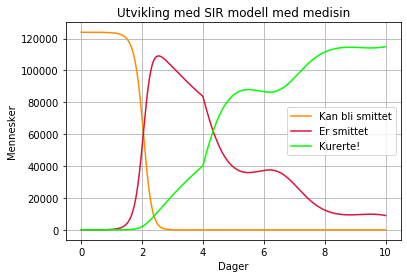

In [4]:
#import numpy as np
#import matplotlib.pyplot as plt

#Oppdaterer smitte funksjonen/raten til oppgave e
def smitte(t):
    return 2e-5 * (t+1) * np.exp(-0.01*t**2)

#Oppdaterer friskhetsraten til oppgave e
def friske(t):
    if t < 4: #dersom t > 4 er det en naturlig friskhetsrate
        f = 0.2
        
    else: #På den fjerde dagen endres friskhetsraten pga medisin-innføring
        f = 0.4 + 0.5 * np.sin(0.6*t*np.pi)
        
    return f

#Gir verdiene fra "sirmodell" til t, S, I, R
t, S, I, R = sirmodell10(antall, smitte, friske, S0, I0, R0)

#Plotter t, S, I, R for å se om den er lik som i oppgave c
plt.plot(t, S, color = "darkorange", label = "Kan bli smittet") 
plt.plot(t, I, color = "crimson", label = "Er smittet") 
plt.plot(t, R, color = "lime", label = "Kurerte!") 
plt.title("Utvikling med SIR modell med medisin") 
plt.xlabel("Dager") 
plt.ylabel("Mennesker")
plt.legend(loc = "best")
plt.grid("on") #Setter på rutenett for å gjøre det litt lettere å se forskjellene
plt.show()


#### Kommentarer
Ut i fra grafen kan vi se at den ikke er lik den vi fikk i oppgave c. Hvis vi ser nøye på grafen kan vi se at grafen frem til $t = 4$, har lik utvikling som i c, bare at den har gått mye fortere. Dette er fordi b øker proporsjonalt med tiden, så forholdet er det samme, og endringen er derfor lik, men bare raskere. Vi ser jo at i denne grafen tar det ca, $2,5$ dager før alle som kan bli smittet er blitt smittet, kontra omtrendt $t = 6$ i oppgave c.

Vi ser også at grafen er helt annerledes fra og med $t = 4$ i forhold til oppgave c. Her blir grafen påvirket av at $f$ nå er annerledes enn det den var før. Om vi ser på hvilke vei utviklingen av grafen kommer til å ta i e kontra c ser vi også at vaksinen tydelig øker raten mennesker blir friske på. 

Til slutt vil jeg kommentere én ting til, og jeg satte på et rutenett for å gjøre dette lettere å se. Fra det tidspunktet "Kan bli smittet" blir 0, speiler "Er smittet" og "Friske!", med andre ord ca. fra $t = 2.5$. Dette er fordi man enten er i befolknings gruppe 1,2 eller 3. Om det ikke lenger er noen i befolkningsgruppe 1, vil alle endringer som skjer i 2, ha en lik motsatt endring i 3. 

## Oppgave 2.
### Finn data på antall smittede i Norge på internett (f.eks. FHI). Legg dataene i en fil, les dataene og plott antall smittede som funksjon av tid.

Data er samlet inn fra Folkehelseinstituttet. Deretter er den blitt sortert i excell og skrevet til tekstfilen "SmitteNorge.txt". Koden nedenfor leser data fra denne filen og plotter antallet mennekser som har vært smittet gjennom perioden.

Dataene inneholder ingen informasjon om folk som blir friske, så den tar ingen hensyn til dette. Derfor vil den bare fortsette å stige, og aldri bli negativ.

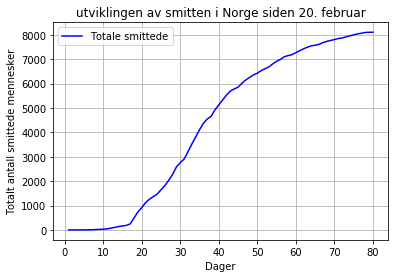

In [5]:
#import numpy as np 
#import matplotlib.pyplot as plt 

#Leser data fra filen SmitteNorge.txt og lagrer den ene kolonnen i en listen "dag", lagrer den andre i "smittede"
fil = np.loadtxt("SmitteNorge.txt", dtype = int, delimiter = "\t", skiprows = 1)
dag = fil[:, 0]
smittede = fil[:, 1]

# Plotter dataen
plt.plot(dag, smittede, "b", label = "Totale smittede")
plt.title("utviklingen av smitten i Norge siden 20. februar")
plt.xlabel("Dager")
plt.ylabel("Totalt antall smittede mennesker")
plt.legend(loc = "upper left")
plt.grid("on")
plt.show()

In [6]:
#Dette er en annen måte å gjøre det på, men her kan det ha oppstått feil ettersom all data er skrevet inn manuelt
"""
import numpy as np
import matplotlib.pyplot as plt

#Skriver data til en array, skrevet manuelt
DataKorona = np.asarray([0, 1, 4, 7, 15, 19, 25, 33, 54, 84, 111, 145, 167, 192, 277, 489, 621, 750, 907, 1077, 1169, 1308, 1423, 1552, 1742, 1926, 2132, 2371, 2566, 2916, 3156, 3581, 3845, 4102, 4226, 4447, 4655, 4935, 5208, 5349, 5510, 5755, 5863, 6010, 6160, 6244, 6320, 6415, 6488, 6566, 6677, 6791, 6791, 6791, 6984, 7113, 7166, 7250, 7345, 7408, 7408, 7408, 7533, 7605, 7667, 7710, 7759, 7783, 7809, 7847, 7903, 7954, 7995, 8034, 8034, 8069, 8099, 8106])

#lagrer til en fil
np.save("DataKorona.npy", DataKorona)

#Laster inn dataen
Laster = np.load("DataKorona.npy")
"""

'\nimport numpy as np\nimport matplotlib.pyplot as plt\n\n#Skriver data til en array, skrevet manuelt\nDataKorona = np.asarray([0, 1, 4, 7, 15, 19, 25, 33, 54, 84, 111, 145, 167, 192, 277, 489, 621, 750, 907, 1077, 1169, 1308, 1423, 1552, 1742, 1926, 2132, 2371, 2566, 2916, 3156, 3581, 3845, 4102, 4226, 4447, 4655, 4935, 5208, 5349, 5510, 5755, 5863, 6010, 6160, 6244, 6320, 6415, 6488, 6566, 6677, 6791, 6791, 6791, 6984, 7113, 7166, 7250, 7345, 7408, 7408, 7408, 7533, 7605, 7667, 7710, 7759, 7783, 7809, 7847, 7903, 7954, 7995, 8034, 8034, 8069, 8099, 8106])\n\n#lagrer til en fil\nnp.save("DataKorona.npy", DataKorona)\n\n#Laster inn dataen\nLaster = np.load("DataKorona.npy")\n'

In [7]:
#Dette er en tredje måte å gjøre det på, men her kan det ha oppstått feil ettersom all data er skrevet inn av meg
"""
import matplotlib.pyplot as plt
import numpy as np

#Gir x og y verdier til lister
xVerdier = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76]
yVerdier = [0, 1, 4, 7, 15, 19, 25, 33, 54, 84, 111, 145, 167, 192, 277, 489, 621, 750, 907, 1077, 1169, 1308, 1423, 1552, 1742, 1926, 2132, 2371, 2566, 2916, 3156, 3581, 3845, 4102, 4226, 4447, 4655, 4935, 5208, 5349, 5510, 5755, 5863, 6010, 6160, 6244, 6320, 6415, 6488, 6566, 6677, 6791, 6791, 6791, 6984, 7113, 7166, 7250, 7345, 7408, 7408, 7408, 7533, 7605, 7667, 7710, 7759, 7783, 7809, 7847, 7903, 7954, 7995, 8034, 8034, 8069, 8099, 8106]

#åpner med fil
Korona = open("datasett2.txt", "w+")

#Lager fil av x og y verdier i 2 kolonner
for i in range(len(xVerdier)):
    Korona.write(str(xVerdier[i]) + " " + str(yVerdier[i]) + "\n")

#laster dataen
data = np.loadtxt(Korona, dtype=int, delimiter = " ")

#Leser dataen og gir dem til 2 filer, ene kolonnen alle elementer også den andre
dag = list(data[:, 0]) #Her sier jeg at dag er alle tallene i "første" kolonne, og lagrer det i en liste.
Smitte = list(data[:, 1])
"""

'\nimport matplotlib.pyplot as plt\nimport numpy as np\n\n#Gir x og y verdier til lister\nxVerdier = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76]\nyVerdier = [0, 1, 4, 7, 15, 19, 25, 33, 54, 84, 111, 145, 167, 192, 277, 489, 621, 750, 907, 1077, 1169, 1308, 1423, 1552, 1742, 1926, 2132, 2371, 2566, 2916, 3156, 3581, 3845, 4102, 4226, 4447, 4655, 4935, 5208, 5349, 5510, 5755, 5863, 6010, 6160, 6244, 6320, 6415, 6488, 6566, 6677, 6791, 6791, 6791, 6984, 7113, 7166, 7250, 7345, 7408, 7408, 7408, 7533, 7605, 7667, 7710, 7759, 7783, 7809, 7847, 7903, 7954, 7995, 8034, 8034, 8069, 8099, 8106]\n\n#åpner med fil\nKorona = open("datasett2.txt", "w+")\n\n#Lager fil av x og y verdier i 2 kolonner\nfor i in range(len(xVerdier)):\n    Korona.write(s

## Oppgave 3.
### Gjør en regresjonsanalyse med polyfit og tilpass en modell til tallene.

Etter å ha prøvd meg frem med forskjellige n-te grader i polyfit, landet jeg på 8. grad, ettersom det passet best med dataene og plotten fra oppgave 2, samt at tallet ikke ble negativt når jeg generte nye t og y verdier.

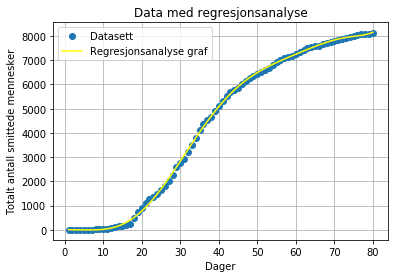

In [8]:
#Generer koeffisienter med polyfit for et 8. grads polynom
k = np.polyfit(dag, smittede, 8) #koeffisienter står i minkende rekkefølge

#Kobler hver koeffisient til tilsvarende xˆn og lager polynomuttrykket
poly = np.poly1d(k) 

#Lager en array med y-verdiene for hver x-verdi (dag), "dag" er hentet fra oppgave 3, samme som "smittede"
p = poly(dag) 

#Plotter grafen
plt.plot(dag, smittede, "o", label = "Datasett")
plt.plot(dag, p, color = "yellow", label = "Regresjonsanalyse graf")
plt.xlabel("Dager")
plt.ylabel("Totalt antall smittede mennesker")
plt.title("Data med regresjonsanalyse")
plt.legend( loc = "upper left")
plt.grid("on")
plt.show()

Ut i fra datasettet kan vi se at en lineær regresjon ikke vil passe til grafen. En andregradsregresjon ville passet bedre, men heller ikke optimalt i forholdt til datasettet.

### Oppgave 4.
### FHI (Folkehelseinstituttet) regner med at 2,2 millioner nordmenn kan bli smittet. Når skjer dette i følge modellen din?

På grunnlag av at det ble spådd at omtrendt halve Norges befolkning kom til å bli smittet, innførte regjeringen store tiltak for å stoppe spredningen. Disse ble innført 21 dager etter vi fikk vår første smittede og førte til en utflating på den tidligere eksponentielle grafen. Videre ut ser vi at smitten omtrendt har stoppet opp, og vil aldri nå 2,2 millioner. Derfor er bare data for de 21 første dagene brukt i denne oppgaven. 

Anslaget fra Folkehelseinstituttet (FHI) anslo at omtrendt 2/3 av de smittsomme ikke ville vise noen sympotomer, som betyr at det smittetallet vi registrer burde ganges med 3 for å få å finne det faktisk smittede antallet i landet. I tilleg var det ventet at det ble reportert et for lite antall i startfasen, ettersom testmuligheten var sterkt begrenset. Derfor regnet de med at man måtte gange smittetallet med 2 for å finne det korrekte antallet. Basert på disse antakelsene kom FHi frem til at ca. 2,2 millioner nordmenn ville bli smittet, og at dette ville skje innen 2021 (ca 270 dager).

For å modellere grafen har jeg brukt en andregrads funksjon for å etterligne den eksponensielle veksten de første 21 dagene. Ettersom modellen ikke vil ta hensyn til en oppbygning av folkeimunitet eller norges befolkning, vil grafen øke til det uendelige. Derfor vil ikke grafen flate ut noen gang, som kan fører til at grafen treffer 2,2 millioner raskere enn det som antakelig kommer til å skje.

Jeg har også plottet regresjonen til et 8. gradspolynom, for å vise at dette ikke passer til denne oppgaven. Det passet fint til datasettet, men beskriver ikke noe godt hvordan smittet vil spre seg videre. 


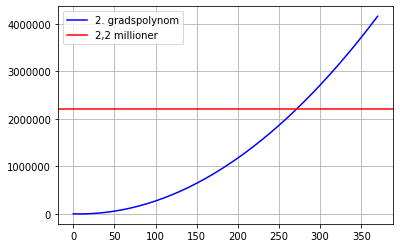

Antall dager før 2,2 millioner er smittet i Norge:  271


In [9]:
# 2. gradspolyfit for de første 21 dagene, dagene før tiltak kom med i bildet
k2 = np.polyfit(dag[0:21], 2*3*smittede[0:21], 2)

#Setter uttrykket lik 2,2 millioner og finner x
k2[2] = k2[2] - 2.2e6
rot = np.roots(k2)

#Setter den positive verdien av x til svaret
if rot[0] > rot[1]: rot[1] = rot[0] # rot[1] er nå den positive verdien

#Regner ut nye y verdier for 100 dager etter at y-verdien er 2,2 millioner
dag2 = np.arange(0, int(rot[1])+100, 10)
k2[2] = k2[2] + 2.2e6
poly2 = np.poly1d(k2)
p2 = poly2(dag2)

#Plotter grafen
plt.plot(dag2, p2, "b")
plt.axhline(y = 2.2e6, color = "r")
plt.legend(("2. gradspolynom", "2,2 millioner"), loc = "upper left")
plt.grid("on")
plt.show()
print("Antall dager før 2,2 millioner er smittet i Norge: ", int(rot[1]))

Om vi kun tar utgangspunkt i de 21 første dagene før tiltakene og ganger smittetallet med 2*3, ser vi at får omtrendt det samme svaret som FHI.

## Oppgave 5.
### Tilpass  SIR-modellen din  fra oppgave a)  til  koronasituasjonen i  Norge  eller Kina.  Kommenter hvilke tilpasninger du har gjort og begrunn valgene dine.
#### Jeg velger Kina

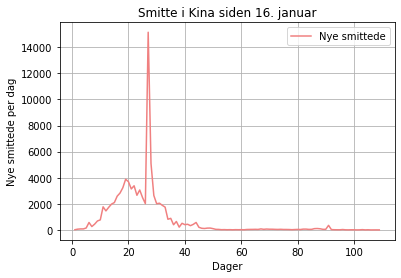

Kina la til omtrendt 13.000 smittede på en dag, som en konsekvens av feilrapportering
Dette førte til en kjempe øknning i kurven, og forklarer den rare hoppet i kurven over og under
(Det ville vært bedre å legge på litt mennesker over flere dager i stedet for alle 1 dag).


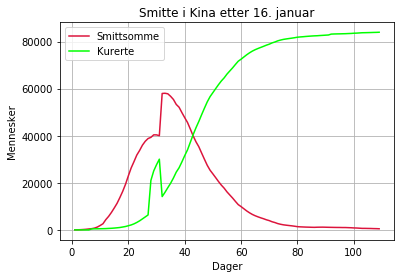

Plotten utelater å plotte antall mulig smittede (suspectible), ettersom den er ekstremt mye større enn smittetallene og ville gjort plotten uleselig.


In [10]:
#import numpy as np # Linear algebra
#import matplotlib.pyplot as plt # Plotting

#Leser data fra filen til arrayene dager, nye (smittede), og smi (totale smittsomme)
fil = np.loadtxt("InfChina.txt", dtype = int, delimiter = "\t", skiprows = 1)
dager = fil[:, 0]
nye = fil[:, 1]
smi = fil[:, 2]

#Finner nye verdier for kurerte (dette inkluderer folk som har dødd)
nyKurerte, kurerte = np.zeros([2, len(dager)])
for i in range(1, len(dager)-1):
    nyKurerte[i] = smi[i] + nye[i] - smi[i+1]
    kurerte[i+1] = kurerte[i] + nyKurerte[i]

#Plotter nye smittede per dag
plt.plot(dager, nye, color = "lightcoral", label = "Nye smittede")
plt.title("Smitte i Kina siden 16. januar")
plt.xlabel("Dager")
plt.ylabel("Nye smittede per dag")
plt.legend(loc = "upper right")
plt.grid("on")
plt.show()

#Forklaring på det rare hoppet etter ca 30 dager
print("Kina la til omtrendt 13.000 smittede på en dag, som en konsekvens av feilrapportering")
print("Dette førte til en kjempe øknning i kurven, og forklarer den rare hoppet i kurven over og under")
print("(Det ville vært bedre å legge på litt mennesker over flere dager i stedet for alle 1 dag).")

#Plotter de smittsomme og kurerte menneskene
plt.plot(dager, smi, color = "crimson", label = "Smittsomme")
plt.plot(dager, kurerte, color = "lime", label = "Kurerte")
plt.title("Smitte i Kina etter 16. januar")
plt.xlabel("Dager")
plt.ylabel("Mennesker")
plt.legend(loc = "upper left")
plt.grid("on")
plt.show()

#Smittetallene er ekstremt små i forhold til befolkningen i Kina
print("Plotten utelater å plotte antall mulig smittede (suspectible), ettersom den er ekstremt mye større enn smittetallene og ville gjort plotten uleselig.")


#Oppretter konstater for SIR parameterne i Kina
#Start verdier
N = 1.44e9 # Populasjonen i Kina
I0, R0 = smi[0], kurerte[0]
S0 = N-I0

#Her antar jeg at en person er smittsom i T dager
T = 10
def f(t):
    return 1/T

#Byer i Hubei ble stengt etter 7 dager, og en endring i data ble sett gradvis etter T dager
stengt = 8
b0 = 0.43/N #Funnet ved å se på og sammenligne med plotten til I(t) opp til t = (stengt+T)
bfac = 0.006 #Funnet ved å se på og sammenligne med plotten til I(t) etter t = (stengt+T)
def b(t):
    if t < stengt+T:
        b = b0
        
    else:
        b = b0/(1+((t-(stengt+T))**3)*bfac) #Reduserer b gradvis gjennom en 3. gradsfunksjon av tiden
        
    return b

### Kommentarer til tilpassningene og hvorfor de er blitt gjort

Startverdiene $I(0)$ og $R(0)$ er tatt fra de første tilfellene som er raportert, mens $S(0)$ er lik hele Kinas populasjon (N) minus smittede N -$I(0)$. Selvom utbruddet av viruset startet i Wuhan (11 millinoer) spredte det seg raskt til hele Hubei (60 millioner) og resten av Kina (1,44 milliarder). Men på grunn av måten de håndterte viruset på, er smittetallet og kurerte forblitt ekstremt lavt i forhold til resten av befolkningen. Den er derfor ikke blitt tatt med i modellen.

Smitteperioden $T$ for en gjennomsnittsperson har blitt satt til 10 og modellen bruker en konstant friskhetsrate lik invers av $T$: (*i.e.* $f(t) = 1/10$). Det finnes foreløpig ingen medisin eller vaksine mot viruset, og friskhetsraten er derfor satt til en kostant.

I starten av virusutbruddet er spredningsraten satt til en konstant $b(t)$ for å skape en eksponensiel vekst. Verdien for denne er funnet ved å se og sammenligne grafen med plotten til $I(t)$.

En stund etter utbruddet stengte Kina alle store byer i Hubei for å stoppe spredningen av viruset. Dette skjedde omtrendt 8 dager etter at smittetallene begynte å komme inn. Konsekvensen av denne stengingen så man først litt senere, omtrendt like lenge som smittsomperioden. Dette er blitt vist ved å redusere spredningsraten etter 8+T dager.

Til slutt er det blitt regnet med at det tok litt tid før menneskene ble vandt til det nye karantene livet. Derfor er reduksjonen i $b(t)$ gradvis og vist ved en 3. grads funksjon av tiden. Denne verdien er også blitt funnet ved å sammenligne med den plottede grafen til $I(t)$ for den relevante tidsperioden.

## Oppgave 6. 
###  Lag plott og drøft utfallene av simuleringene du gjør med SIR-modellen i forrige oppgave.

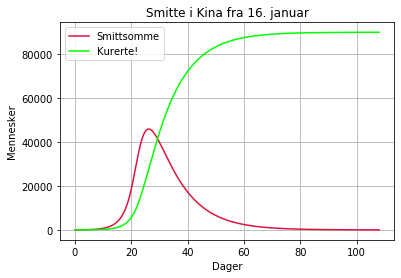

In [11]:
def sirmodell(bt, ft, S0, I0, R0, antall, tidstopp):
    """
    Function to calculate t, S(t), I(t), and R(t) for the given parameters.
    
    #bt = function of time, b(t)*S(t)*I(t) gets infected per day
    #ft = function of time, f(t)*I(t) is recovered per day
    S0, I0, R0 = starting condition in the population
    tpoints = number of samples in time, i.e. the number of elements in each return vector
    tstop = stop time, (time starts at 0)
    """

    #Tid
    t = np.linspace(0, tidstopp, antall)
    dt = t[1] - t[0]
    
    #Oppretter vektorer
    S, I, R = np.zeros((3, antall))
    S[0], I[0], R[0] = S0, I0, R0
        
    #Eulersmetode
    for i in range(antall-1):
        S[i+1] = S[i] - (bt(t[i]) * S[i] * I[i]) * dt
        I[i+1] = I[i] + ((bt(t[i]) * S[i] * I[i]) - (ft(t[i]) * I[i])) * dt
        R[i+1] = R[i] + (ft(t[i]) * I[i]) * dt
    
    return t, S, I, R

#Dager
tidstopp, dt = len(dager)-1, 0.1
antall = int((tidstopp / dt) + 1)

t, S, I, R = sirmodell(b, f, S0, I0, R0, antall, tidstopp)

#Plotter modellen
plt.plot(t, I, color = "crimson", label = "Smittsomme") 
plt.plot(t, R, color = "lime", label = "Kurerte!") 
plt.title("Smitte i Kina fra 16. januar") 
plt.xlabel("Dager") 
plt.ylabel("Mennesker")
plt.grid("on")
plt.legend(loc = "upper left")
plt.show()

### Observasjoner og kommentarer til plotten

Plotten utelater som tidligere $S(t)$ ettersom tallet er mye større og vil ødelegge hensikten med modelleringen. 

Plotten inneholder ikke hoppet i grafen som kom av at Kina la på 13.000 nye tall på en dag. Dette er fordi denne hendelsen ikke faktisk skjedde og er derfor utelatt. De ble som sagt lagt til på grunn av underrapportering.

Det er også en ulikhet på rapportert antall totalt antall som har vært smittet og summen av antall smittede per dag. Dette er på grunn av dårlig rapportering. Modellen ovenfor viser en ideel fremstilling av viruset i Kina.


## Oppgave 7.
### Finn så data på nettet (FHI er en god kilde) om koronaviruset i Norge. Tilpass modellen til disse dataene.

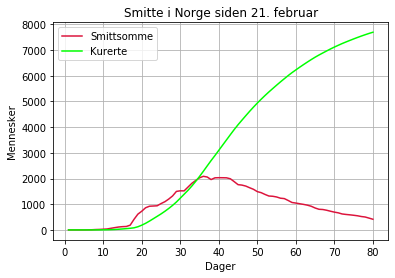

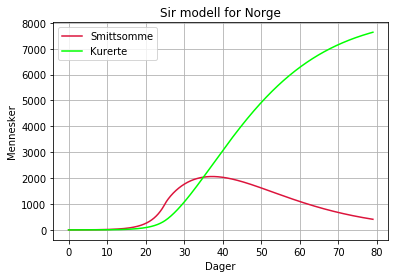

In [12]:
#import numpy as np # Linear algebra
#import matplotlib.pyplot as plt # Plotting

#Leser data fra filen til arrayene dager2 og smittede2
fil = np.loadtxt("SmitteNorge.txt", dtype = int, delimiter = "\t", skiprows = 1)
dager2 = fil[:, 0]
smittede2 = fil[:, 1]

#Anntar at man er smittsom i 10 dager og bestememr friskhetsraten
T = 10
f = 1/T

#Finner smittsomme og kurerte basert på smittede2, og at den nyeKurerte2 er f2 * i(t)
nyKurerte2, smi2, kurerte2 = np.zeros([3, len(dager2)])
nyKurerte2[0] = smi2[0] = smittede2[0]

for i in range(1, len(dager2)):
    nyKurerte2[i] = smittede2[i] - smittede2[i-1]
    smi2[i] = nyKurerte2[i] + int(round((1-f)*smi2[i-1]))
    kurerte2[i] = kurerte2[i-1] + smi2[i-1] - smi2[i] + nyKurerte2[i]

#Plotter kurerte2 og smi2 og utelater S (mulig smittbare) ettersom den er mye større enn smittetallene
plt.plot(dager2, smi2, color = "crimson", label = 'Smittsomme')
plt.plot(dager2, kurerte2, color = "lime", label = "Kurerte")
plt.title("Smitte i Norge siden 21. februar")
plt.xlabel("Dager")
plt.ylabel("Mennesker")
plt.legend(loc = "upper left")
plt.grid("on")
plt.show()


#Oppretter SIR parametere for Norge
#Konstanter startverdi
N = 5367580 # Norges populasjon den 1. januar 2020 i følge SSB
I0, R0 = smi2[0], kurerte2[0]
S0 = N - I0

#Anntar at en person er smittsom i T dager
T = 10
def f(t):
    return 1/T

#Norge startet med å distansere seg fra hverandre ca. 14 dager etter utbruddet, og var i karantene etter 21
dist = 15
b0 = 0.38 / N  #Funnet ved å se på og sammenligne med plotten til I(t) opp til t = (dist+T)
bfac = 0.485 #Funnet ved å se på og sammenligne med plotten til I(t) etter t = (dist+T)

def b(t):
    if t < dist+T:
        b = b0
        
    else:
        b = b0/(1+(t-(dist+T))**(0.7)*bfac) #Reduserer b gradvis som en konsekvens av at folk blir vandt til karantene
        
    return b

#Dager
tidstopp, dt = len(dager2)-1, 0.1
antall = int((tidstopp / dt) + 1)

t, S, I, R = sirmodell(b, f, S0, I0, R0, antall, tidstopp)

#Plotter I og R i samme figur
plt.plot(t, I, color = "crimson", label = "Smittsomme")
plt.plot(t, R, color = "lime", label = "Kurerte")
plt.title("Sir modell for Norge")
plt.xlabel("Dager")
plt.ylabel("Mennesker")
plt.legend(loc = "upper left")
plt.grid("on")
plt.show()


### Vurderinger

I motsetning til kina er det ingen tall på smittsomheten i Norge, bare tall på smittede per dag og totalt antall som har vørt smittet. Derfor er tallet for smittsomhet og friskhetsraten en funksjon basert på en antatt smittspomhetsperiode. Og akkurat som i oppgave 5 er  $f(t)$ en konstant lik 1/10.

Den faktiske sprednignen av sykdommen i starten var større enn den antatte i forhold til denne modellen. Grunne til dette var nok at det var da korona kom til Norge. Mange hadde vært på vinterferie, og tat med seg koronaen hjem. Dermed fikk vi en stor økning helt på starten. Etter dette ble landets grenser stengt, og man ble kun smittet av andre. Her passer modellen ganske bra med hvordan grafen faktisk ser ut. 

Det å stenge landegrensene, øke sosial distansering og å vakse henda ofte har vist seg å ha hatt en positiv effekt på å motvirke spredning. 2,5 måneder etter utrbuddet i Norge er det veldig få smittsomme mennesker igjen.